Q-5. Uber is a taxi service provider as we know, we need to predict the high booking area using an Unsupervised algorithm and price for the location using a
supervised algorithm and use some map function to display the data

In [208]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [197]:
df = pd.read_csv(r"D:\assignments\Machine_learning\data\rideshare_kaggle.csv")

In [198]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [199]:
df.shape

(693071, 57)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [201]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [202]:
df.duplicated().sum()

0

There is no duplicates

In [203]:
import numpy as np
df["price"] = df["price"].fillna(np.nanmedian(df["price"]))

In [204]:
df['price'].isnull().sum()

0

In [205]:
df = df.drop(['id', 'timestamp', 'product_id', 'datetime'],axis=1)

In [206]:
# Define which columns should be ordinal-encoded and which should be scale
categorical_cols = df.select_dtypes(include='object') .columns
numerical_cols = df.select_dtypes(exclude='object').columns
print("numerical_columns: ",numerical_cols)
print("categorical columns: ",categorical_cols)

numerical_columns:  Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'latitude', 'longitude', 'temperature', 'apparentTemperature',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint',
       'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1',
       'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime'],
      dtype='object')
categorical columns:  Index(['timezone', 'source', 'destination', 'cab_type

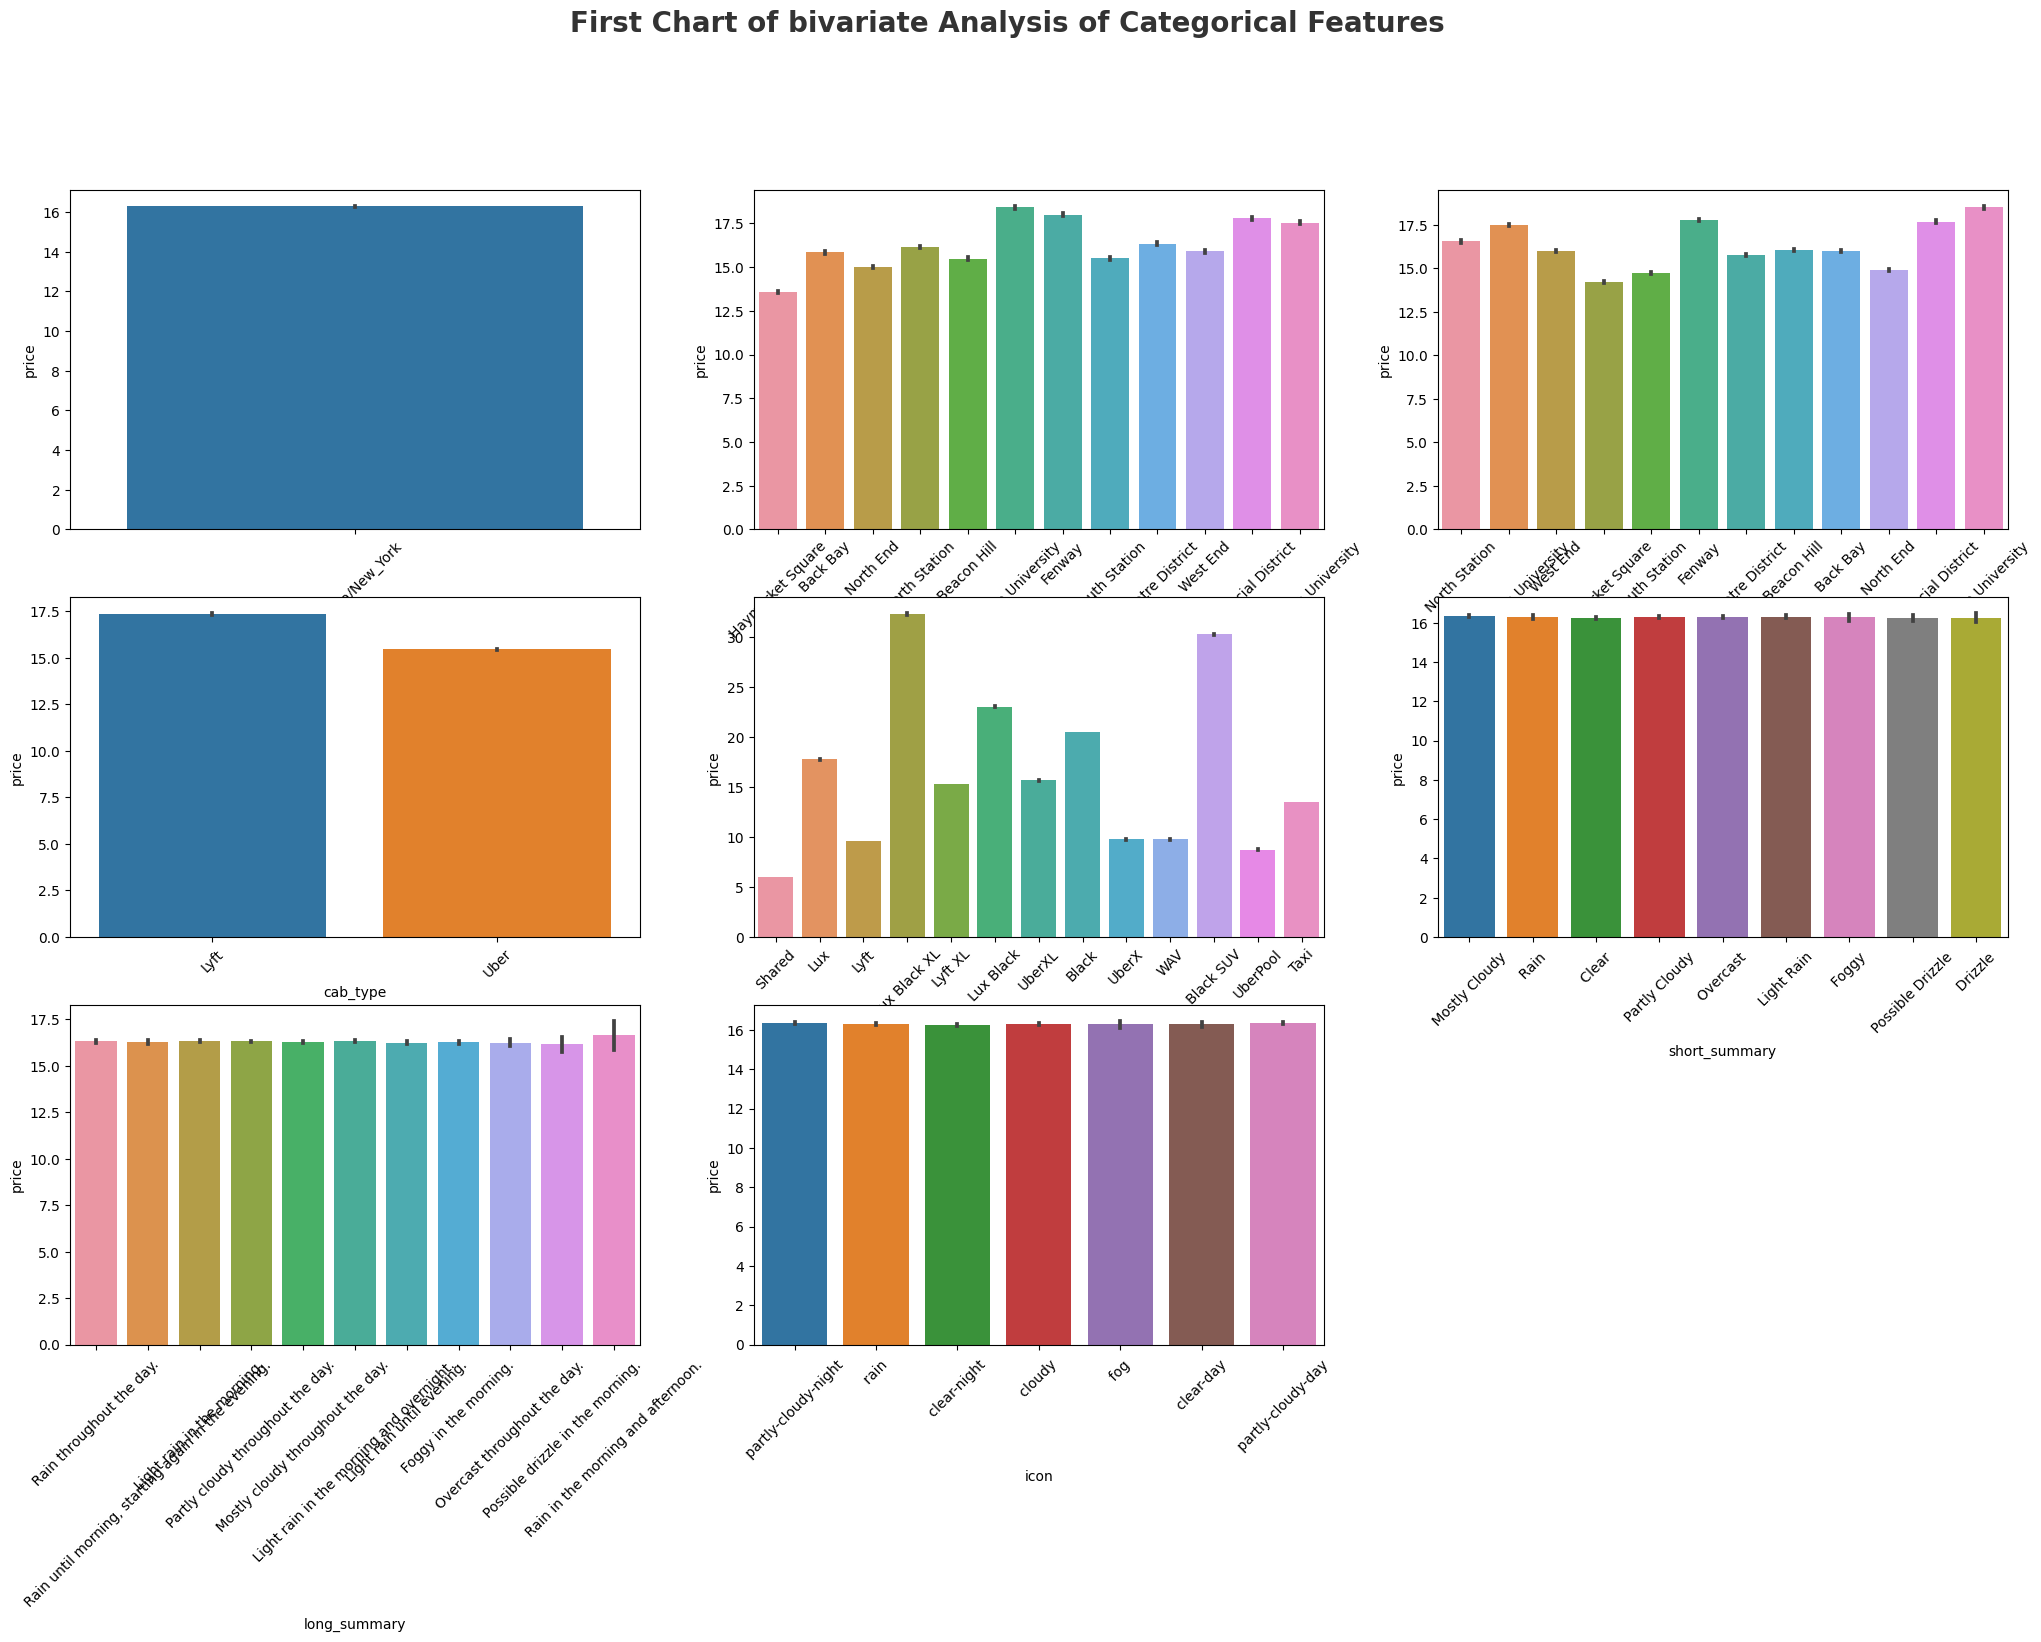

In [212]:
# plot for categorical columns
categorical_cols = ['timezone', 'source', 'destination', 'cab_type', 'name', 'short_summary', 'long_summary', 'icon']
plt.figure(figsize=(25, 15))
plt.suptitle('First Chart of bivariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8,y=1)
for i in range(0, len(categorical_cols)):
    plt.subplot(3, 3, i+1)
    sns.barplot(data = df, x = df[categorical_cols[i]], y ='price')
    plt.xticks(rotation=45)
    #plt.tight_layout()

We can drop the columns timezone, short_summary, long_summary and icon beacuase they are not affecting the target data. timezone column has only one value that is America/Newyork.

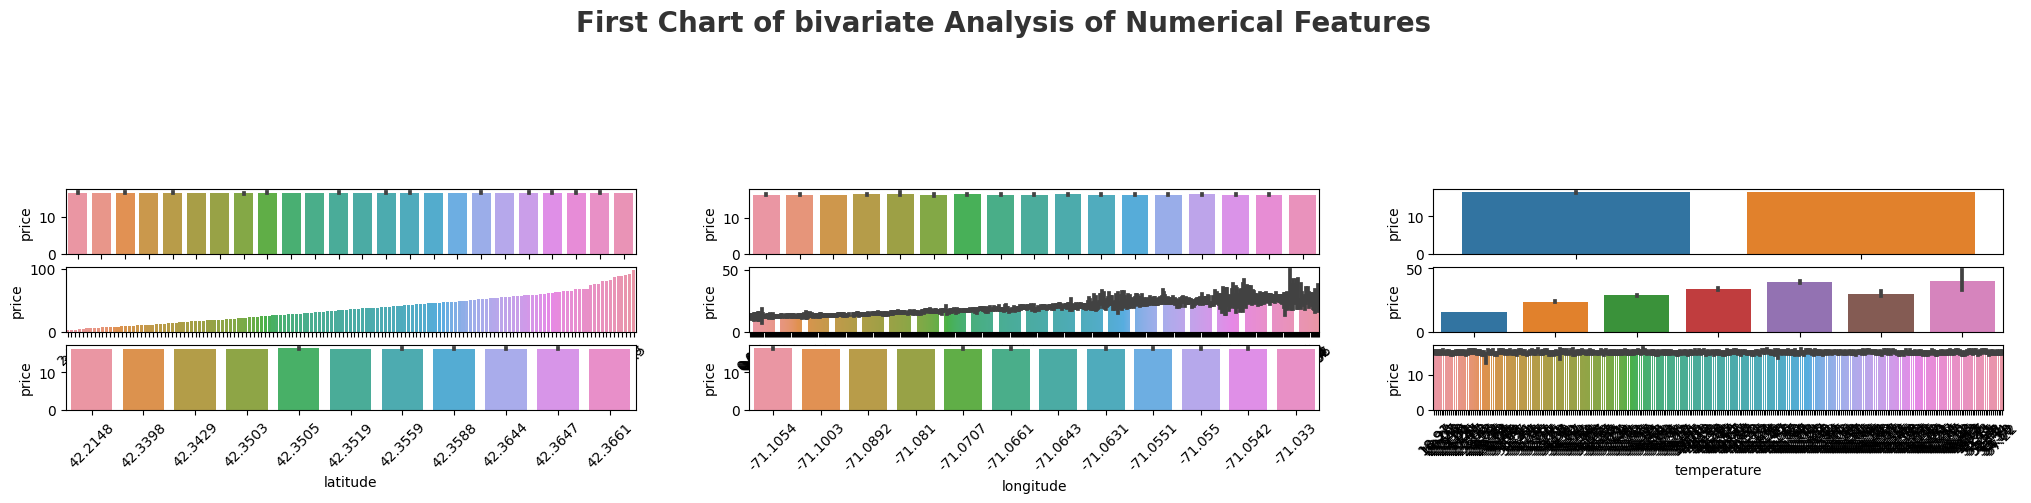

In [223]:
# plot for categorical columns
numerical_cols1 = ['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature']
plt.figure(figsize=(25, 15))
plt.suptitle('First Chart of bivariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8,y=1)
for i in range(0, len(numerical_cols1)):
    plt.subplot(15, 3, i+1)
    sns.barplot(data = df, x = df[numerical_cols[i]], y='price')
    plt.xticks(rotation=45)

<AxesSubplot: xlabel='temperature', ylabel='price'>

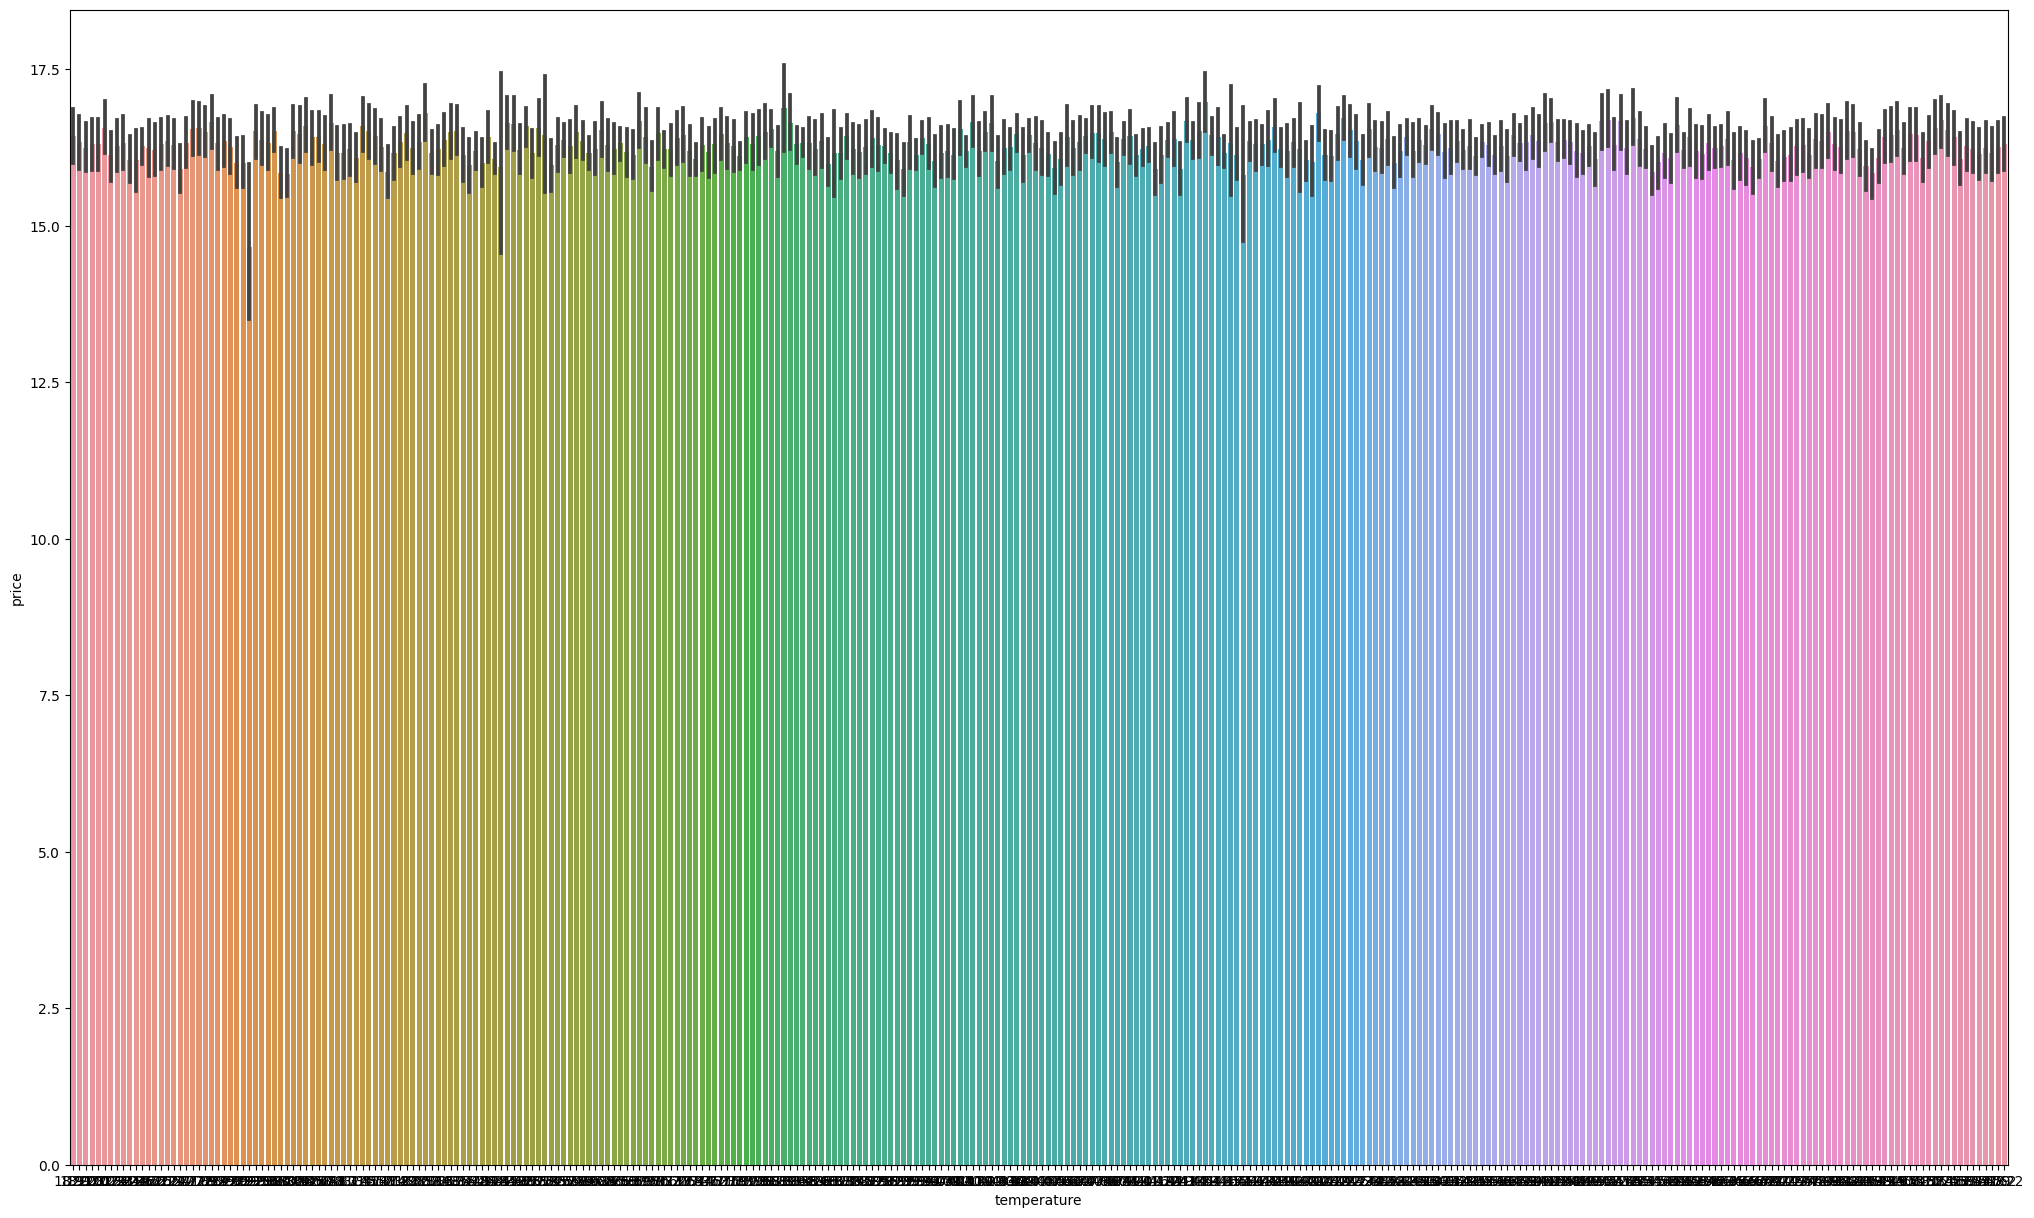

In [229]:
plt.figure(figsize=(25, 15))
sns.barplot(data = df, x = 'temperature', y='price')

In [168]:
## Independent and dependent feature
X = df.drop(labels=['price'],axis=1)
Y = df[['price']]

In [169]:
# Define which columns should be ordinal-encoded and which should be scale
categorical_cols = X.select_dtypes(include='object') .columns
numerical_cols = X.select_dtypes(exclude='object').columns
print("numerical_columns: ",numerical_cols)
print("categorical columns: ",categorical_cols)

numerical_columns:  Index(['hour', 'day', 'month', 'timezone', 'source', 'destination', 'cab_type',
       'name', 'distance', 'surge_multiplier', 'latitude', 'longitude',
       'temperature', 'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime'],
 

In [170]:
# use label encoding on catigorical data
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()

for i in categorical_cols:
    X[i] = lable.fit_transform(X[i])

In [171]:
for i in categorical_cols:
    print(X[i].unique())

<AxesSubplot: >

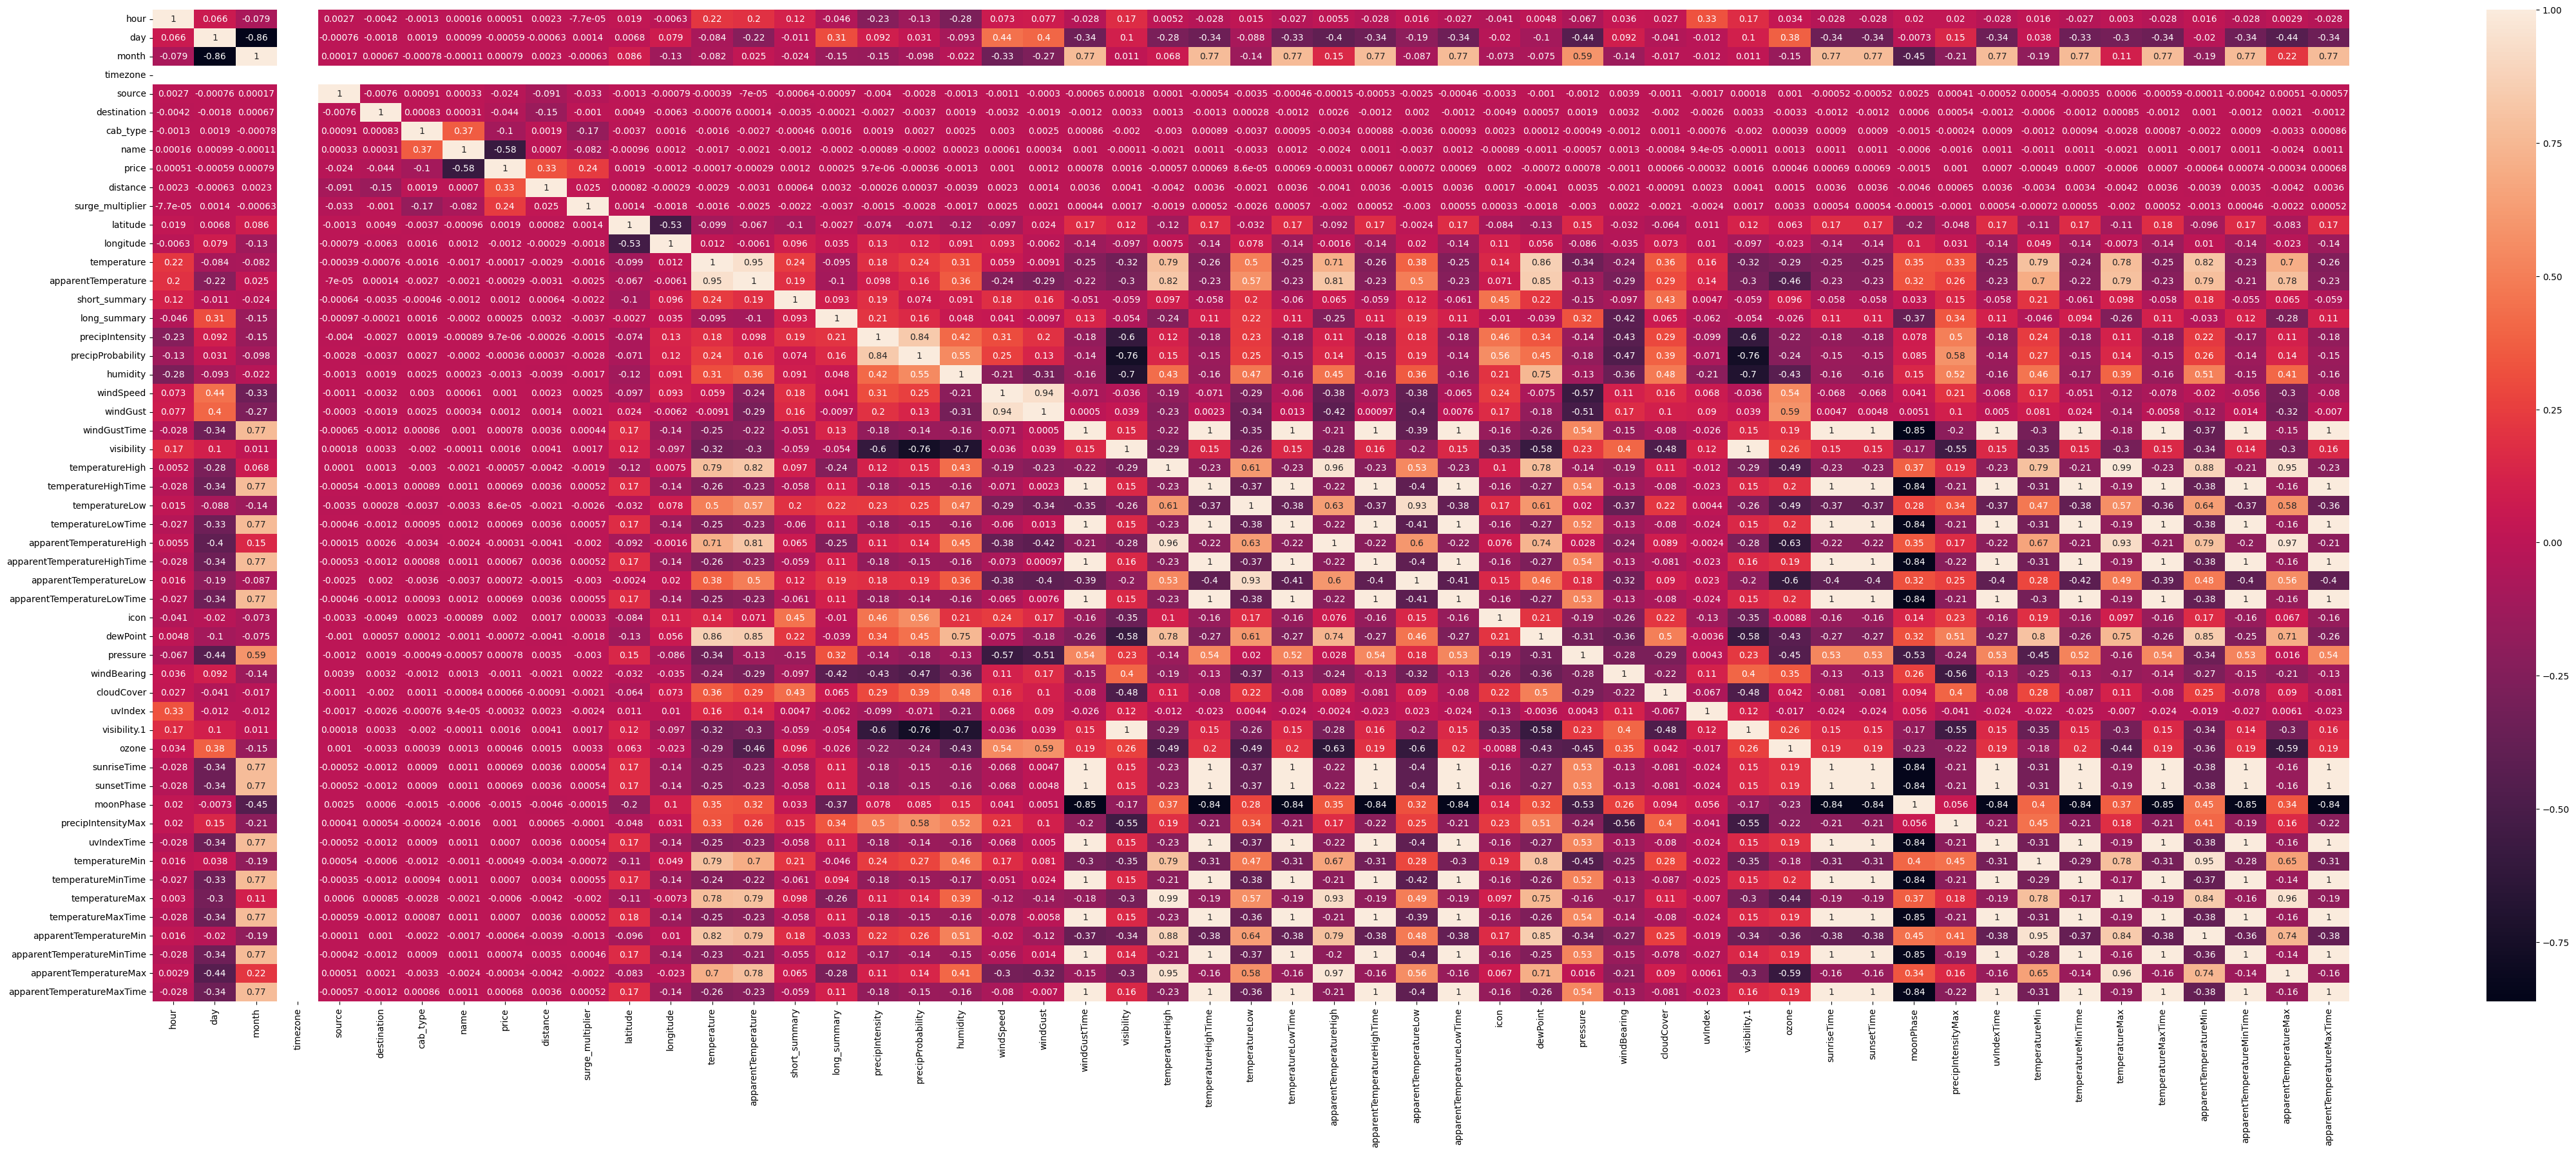

In [143]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(55,20))
sns.heatmap(df.corr(),annot=True)

In [173]:
from sklearn.impute import SimpleImputer  # Handling missing values
from sklearn.preprocessing import StandardScaler  # Handling feature  scaling
from sklearn.preprocessing import OrdinalEncoder  # ordinal encodind
## Pipelines A
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [174]:
## Numerical Pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

cat_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]
)

# Create Preprocessor object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_cols),
    ("cat_pipline",cat_pipline,categorical_cols)
])

In [175]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.40,random_state=123)
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())
X_train.head()

,num_pipline__hour,num_pipline__day,num_pipline__month,num_pipline__timezone,num_pipline__source,num_pipline__destination,num_pipline__cab_type,num_pipline__name,num_pipline__distance,num_pipline__surge_multiplier,...,num_pipline__precipIntensityMax,num_pipline__uvIndexTime,num_pipline__temperatureMin,num_pipline__temperatureMinTime,num_pipline__temperatureMax,num_pipline__temperatureMaxTime,num_pipline__apparentTemperatureMin,num_pipline__apparentTemperatureMinTime,num_pipline__apparentTemperatureMax,num_pipline__apparentTemperatureMaxTime
0,0.054471,-0.378721,0.837657,0.0,0.726609,-1.593527,-1.120131,-1.072581,-0.658113,-0.151759,...,-0.677034,1.101286,-0.980485,1.069772,0.239198,1.108703,-0.276094,1.065175,0.267257,1.111358
1,1.205499,1.224526,-1.193806,0.0,-1.592385,0.725021,-1.120131,-0.278674,-0.948082,-0.151759,...,-0.669788,-0.653003,-0.778020,-0.671324,-0.568748,-0.648422,-0.092054,-0.683661,-0.088752,-0.648541
2,-1.672072,-0.779533,0.837657,0.0,0.436735,-1.013890,0.892753,0.779869,0.721437,-0.151759,...,-0.671600,0.476613,-2.696033,0.449442,-1.731055,0.477806,-2.460690,0.426378,-1.880327,0.476128
3,0.629985,-0.278518,0.837657,0.0,-1.302511,-0.144435,-1.120131,-0.014038,-0.719621,-0.151759,...,-0.541179,1.226221,0.977712,1.283500,1.619438,1.228625,0.971443,1.279852,1.691293,1.225908
4,-1.384315,-1.681359,0.837657,0.0,-0.432888,0.145384,-1.120131,-0.807946,-0.816277,-0.151759,...,-0.669788,-0.653003,-0.744018,-0.676536,-0.476614,-0.648422,-0.354768,-0.699369,-0.214148,-0.632920


In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [177]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    a_score = accuracy_score(y_test,y_pred)
    return mae, rmse, a_score

In [230]:
model = RandomForestRegressor()

In [231]:
model.fit(X_train,y_train)

C:\Users\mohdalwaz\AppData\Local\Temp\ipykernel_12612\2721349307.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForestRegressor()

In [233]:
model.score(X_train,y_train)

0.9906881944944432